# Acoustic Tomography

## Sinogram

This is distribution of amplitude as a function of illumination angle. This illuminated image is a back projection.

Question: How does one go from a sinogram to a back projected image. i.e what is the difference between a sinogram and back projection 

or

The sinogram is essentially a collection of line integrals representing the ray attenuation along different paths through the material. 


This is distribution of amplitude as a function of illumination angle. This illuminated image is a back projection.

Question: How does one go from a sinogram to a back projected image. i.e what is the difference between a sinogram and back projection.

### Forward Projection

Used to generate a forward projection for **one fixed angle**

$$ p(s,\phi) =  R\{\,f(x,y)\,\}$$

#### Summary of symbols

- $ f(x,y) $ describes the the object in "physical space". i.e A standard 2 dimensional coordinate system. The function will evaluate to some value. These values **correspond to density**. High values mean high density, low values mean low density.
- $ p(s,\phi) $ describes the projection space. Simply stated as follows: For a given illumination angle $ \phi $, what is the density for a given position $ s $.
- $ R\{ \, \}$ describes the radon transform, the mapping from density at a given $x,y$ coordinate to the density at a given angle, distance $s, \phi$ coordinate

This results in the following expression:

$$ p(s,\phi) = \int_{L_{s\,\phi}}\,f(x,y)\,du$$

Note that we are transforming from a cartesian domain to something a like a circular domain. i.e instead of expressing a position in terms of $x$ and $y$, we want to express the domain in terms of two orthogonal vectors $s$ and $u$ that change as a function of out illumination angle $\phi$. The mapping between these two spaces is shown below:

$$ \begin{pmatrix} x \\ y\end{pmatrix} = \begin{pmatrix} cos(\phi) & -sin(\phi) \\ sin(\phi) & cos(\phi) \end{pmatrix}\begin{pmatrix} s \\ u \end{pmatrix}$$

Therefore:

$$ x = s\,cos(\phi) - u\,sin(\phi) \\ y = s\,sin(\phi) + u\, cos(\phi)$$

which results in

$$ s = x\,cos(\phi) + y\,sin(\phi)$$

If one then decides to substitute into the equation above we get the following:

$$ p(s,\phi) = \int_{L_{s\,\phi}}\,f(s\,cos(\phi) - u\,sin(\phi),s\,sin(\phi) + u\, cos(\phi))\,du$$

In plain words: The "total density"(?) of a material for a given angle of illumination $\phi$ at position of illumination $s$ is the summation of all the density along the orthogonal path of propagation $$ u.
 

## Back Projection

This is the inverse of the Back Projection

Note that we get $p(s,\phi)$ and want to get back to $f(x,y)$

## Array Simulation

- This sub script shows the position of a set of given array elements that are angularly spaced at a fixes radius (blue)
- It also places an arbitrary square object in the center of the field (green)
- And then shows the direction of propagation of the ray (red)

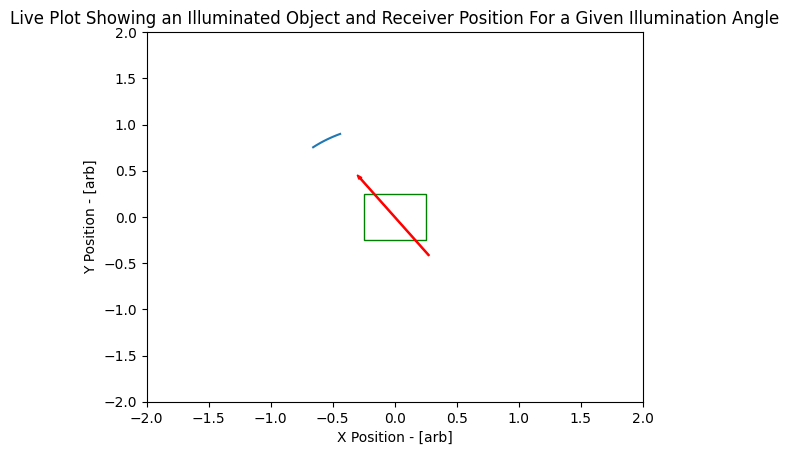

In [101]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation
import numpy as np

# Simulation sample parameters
position_samples = 45
angles_deg = np.linspace(0,359,position_samples, dtype=np.int16)

# Lets define the parameters for the receiving array
radius = 1.0 # How far these elements are spaced from the origin
element_count = 15 # How many elements in the array
element_spacing_deg = 1 # How far apart each element is (deg)
element_spacing_rad = np.deg2rad(element_spacing_deg) #
element_spacing_offsets = np.linspace(0,element_count,element_count)*element_spacing_rad - np.floor(element_count/2) # The radial offset of an element

# And preallocate the physical coordinated of each array element
x = np.zeros((element_count,position_samples))
y = np.zeros((element_count,position_samples))

# Lets now take measurements for every illumination angle
for illumination_angle_index in range(len(angles_deg)):
        
        angle_rad = np.deg2rad(angles_deg[illumination_angle_index])

        # At every angle we need to know the physical position of each element
        # So we assume a curved array, spaced at 1 degree
        for element_index in range(element_count):

            # We convert the spherical coordinates to cartesian 
            # To plot the position of the array
            x[element_index,illumination_angle_index] = (radius * np.sin(angle_rad + element_spacing_offsets[element_index]))
            y[element_index,illumination_angle_index] = (radius* np.cos(angle_rad + element_spacing_offsets[element_index]))

# We can also start to build up our plot
fig, ax = plt.subplots()
ax.axis([-2,2,-2,2])
l, = ax.plot([],[])

# Adding some titles
ax.set_xlabel("X Position - [arb]")
ax.set_ylabel("Y Position - [arb]")
ax.set_title("Live Plot Showing an Illuminated Object and Receiver \n Position For a Given Illumination Angle")

# By adding a simulaed object to the plot by defining the bottom left corner
square = patches.Rectangle((-0.25, -0.25), 0.5, 0.5, linewidth=1, edgecolor='green', facecolor='none')
ax.add_patch(square)

# With the object inplace, we can set up a method to start creating video frames
def GenerateFrame(i):
    l.set_data(x[:,i], y[:,i])

    # Lets remove the old arrows so they dont clutter the plot
    children = ax.get_children()
    for child in children:
        if isinstance(child, patches.FancyArrow):
             child.remove()
    
    # And then show the direction of propagation of the signal
    ax.arrow(-x[7,i]*0.5, -y[7,i]*0.5,x[7,i], y[7,i],width=0.01, color="red")
    
# Now generate all the frames
ani = matplotlib.animation.FuncAnimation(fig, GenerateFrame, frames=len(angles_deg-10))

# And create a pretty pretty video
from IPython.display import HTML
HTML(ani.to_jshtml())